In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd drive/My\ Drive/

/content/drive/My Drive


In [22]:
%cd bc-data

/content/drive/My Drive/bc-data


In [0]:
#Imports
from fastai import *
from fastai.vision import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy as sp
from functools import partial
from sklearn import metrics
from collections import Counter
from fastai.callbacks import *
import PIL
import cv2
import sklearn
import skimage
bs = 64

In [0]:
#images_path
path_images = Path('bc-data')

In [26]:
#data path and init


data = ImageDataBunch.from_folder(path=path_images, train='train', valid='valid', bs=bs, classes=['0','1','2']) 
data.normalize()



ImageDataBunch;

Train: LabelList (13498 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
2,2,2,2,2
Path: bc-data;

Valid: LabelList (2700 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
1,1,1,1,1
Path: bc-data;

Test: None

In [27]:
data.classes

['0', '1', '2']

In [28]:
learn = create_cnn(data, models.densenet161, metrics=error_rate)
learn.freeze()

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:01<00:00, 74.1MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-05
Min loss divided by 10: 6.92E-03


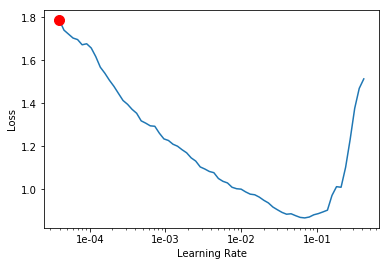

In [29]:
# learn.freeze()
learn.lr_find(start_lr=1e-5, end_lr=1e1, wd=5e-3)
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,time
0,0.347546,0.328098,0.110741,02:00


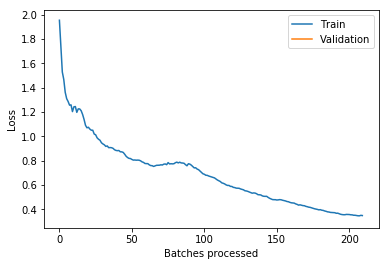

In [30]:
learn.fit_one_cycle(1, max_lr=slice(4e-4, 2e-2))
#learn.save('-stage1')
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,error_rate,time
0,0.310516,0.411088,0.138148,01:53
1,0.255711,0.480656,0.121111,01:52
2,0.168982,0.351464,0.121852,01:52
3,0.101645,0.470920,0.100741,01:52
4,0.042673,3.083816,0.101852,01:52


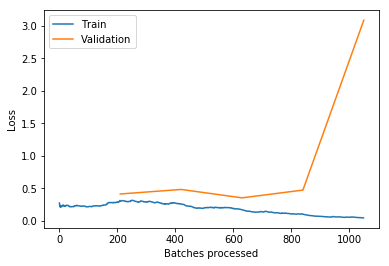

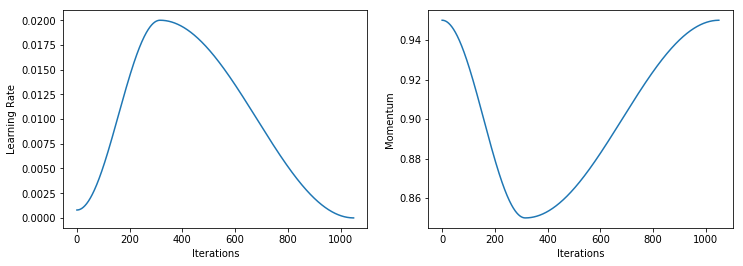

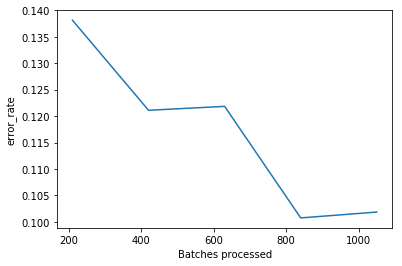

In [31]:
learn.fit_one_cycle(5, max_lr=slice(4e-4, 2e-2))
learn.save('cells-usampled')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [0]:
learn.save('cells-usampled')
learn.export('cells-usampled.pkl')

In [0]:
learn.load('cells-usampled')
interp = ClassificationInterpretation.from_learner(learn)

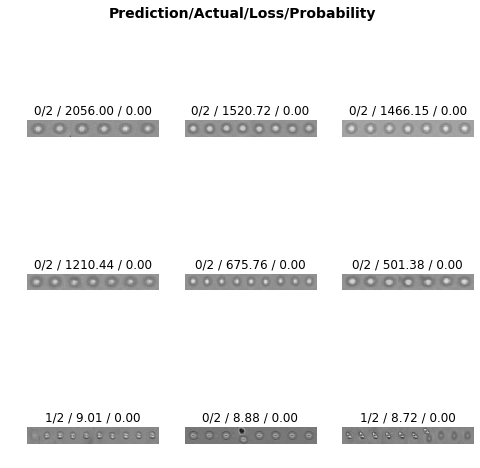

In [34]:
interp.plot_top_losses(9, figsize=(8,8))

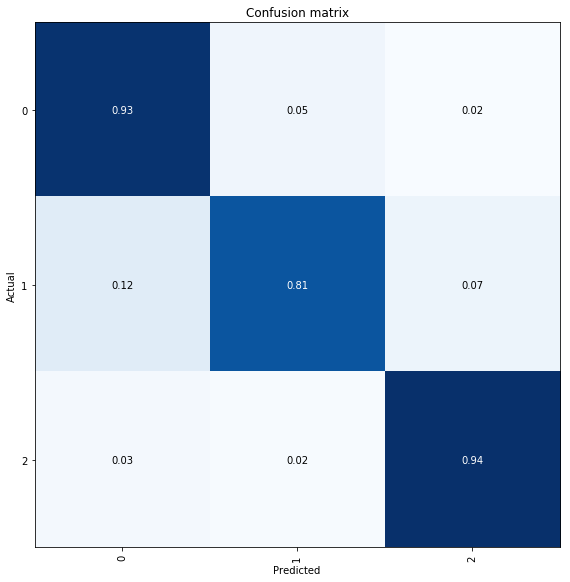

In [35]:
interp.plot_confusion_matrix(normalize=True, figsize=(8,8))

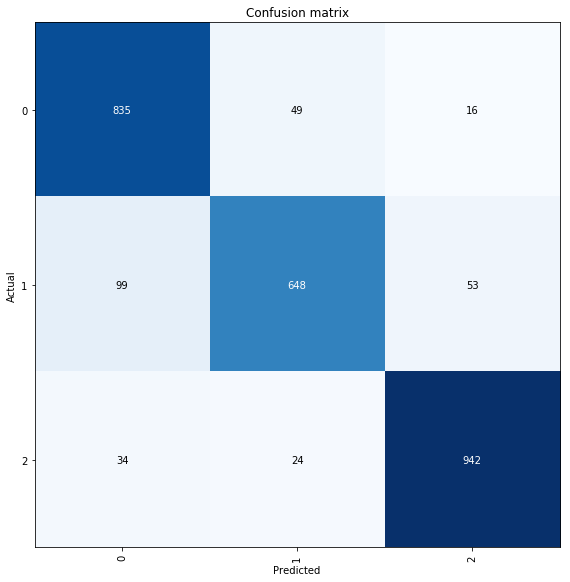

In [36]:
interp.plot_confusion_matrix(figsize=(8,8))

In [37]:
# path_images = Path('cnrs')
data = ImageDataBunch.from_folder(path=path_images, train='train', valid='test', bs=bs, classes=['0','1','2']) 
data.normalize()

ImageDataBunch;

Train: LabelList (13498 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
2,2,2,2,2
Path: bc-data;

Valid: LabelList (2419 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
2,2,2,2,2
Path: bc-data;

Test: None

In [0]:
learn = cnn_learner(data, models.densenet161, metrics=error_rate)

In [0]:
learn = learn.load('cells-usampled')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

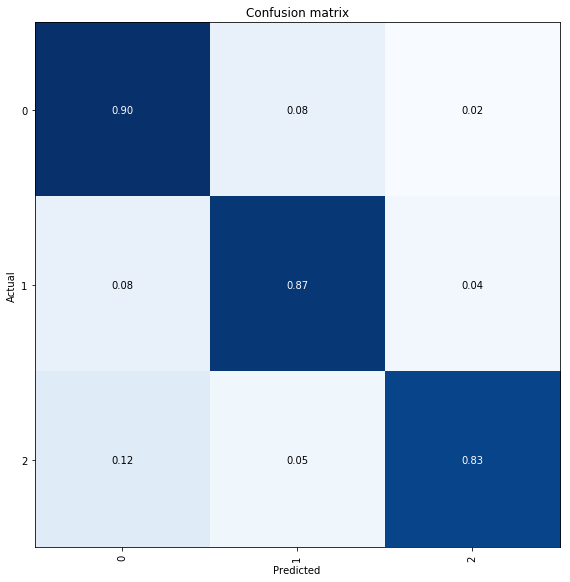

In [41]:
interp.plot_confusion_matrix(normalize=True, figsize=(8,8))

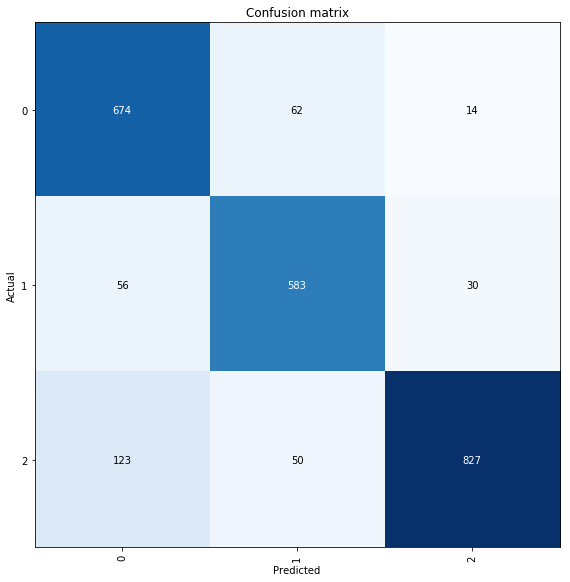

In [42]:
interp.plot_confusion_matrix(figsize=(8,8))

In [43]:
import glob

image_list = glob.glob('bc-data/test/*/*')

C0 = 0
Pred_C0=0
C1=0
Pred_C1=0
C2=0
Pred_C2=0

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    bc_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if bc_class == '0':
        C0 += 1
        if pred_class == '0':
            Pred_C0 += 1
    elif bc_class == '1':
        C1 += 1
        if pred_class == '1':
            Pred_C1 += 1
    elif bc_class == '2':
        C2 += 1
        if pred_class == '2':
            Pred_C2 += 1
            
    
print('C0 classification: ' + str(Pred_C0) + '/' + str(C0))
print('C1 classification: ' + str(Pred_C1) + '/' + str(C1))
print('C2 classification: ' + str(Pred_C2) + '/' + str(C2) )

C0 classification: 674/750
C1 classification: 583/669
C2 classification: 827/1000
